Missings:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64 

Duplicates:
 0 

Feature ranking for discriminative power: 
                     Feature     F_value       p_value
1                   Glucose  213.161752  8.935432e-43
5                       BMI   71.772072  1.229807e-16
7                       Age   46.140611  2.209975e-11
0               Pregnancies   39.670227  5.065127e-10
6  DiabetesPedigreeFunction   23.871300  1.254607e-06
4                   Insulin   13.281108  2.861865e-04
3             SkinThickness    4.304381  3.834770e-02
2             BloodPressure    3.256950  7.151390e-02 

Best feature:
    Feature     F_value       p_value
1  Glucose  213.161752  8.935432e-43 

Worst feature:
          Feature  F_value   p_value
2  BloodPres

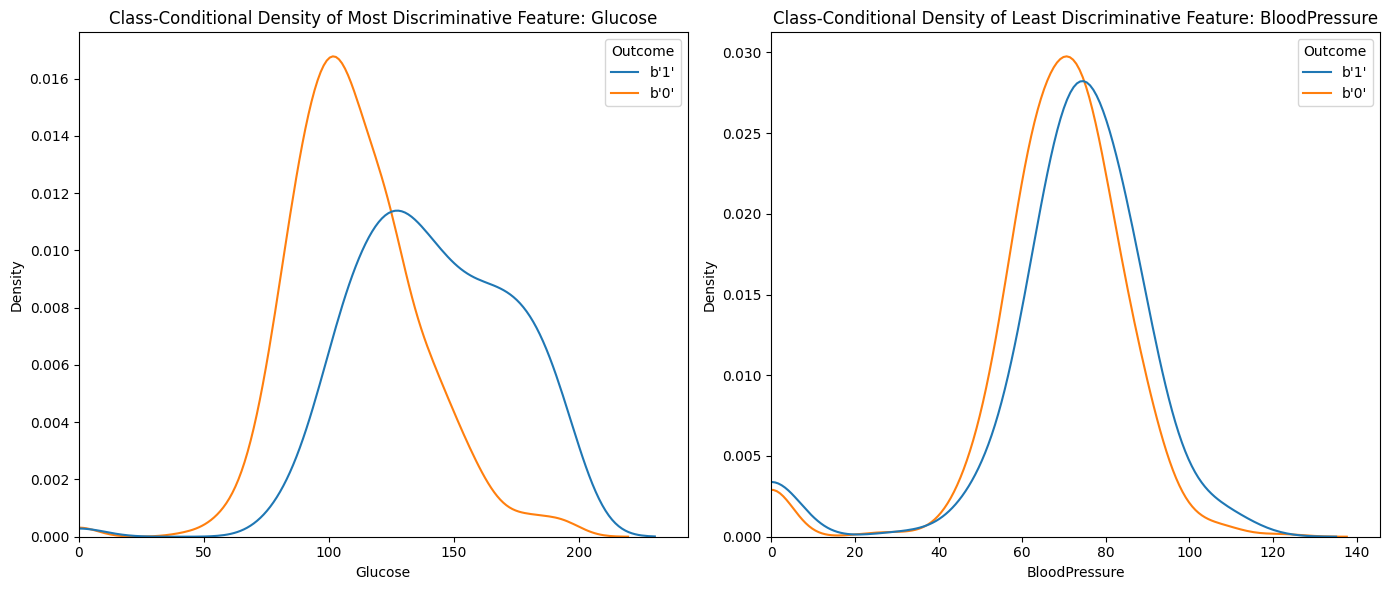

In [11]:
import pandas as pd
from scipy.io import arff
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# PART 2
def arffToDf(file: str):
    data, meta = arff.loadarff(file) # meta contem o nome dos atributos que servem de colunas
    df = pd.DataFrame(data, columns=meta.names()) # converto num data frame com as colunas vindas do meta

    # PRE PROCESSING DATA - MISSINGS AND DUPLICATES
    print("Missings:\n", df.isnull().sum(), "\n") # checks if there are any missing values
    print("Duplicates:\n", df.duplicated().sum(), "\n") # checks if there are any duplicate values

    return df

def rankDiscriminativePower(df):

    # Split features and labels
    X = df.drop(columns=['Outcome'])  # (drop method removes the specified column)
    y = df['Outcome'] 

    F_values, p_values = f_classif(X, y)
    # Sort f_values results with dataframe
    anova_results = pd.DataFrame({'Feature': X.columns, 'F_value': F_values, 'p_value': p_values})
    anova_results = anova_results.sort_values(by='F_value', ascending=False)

    # Display the features with the best and worst discriminative power
    print("Feature ranking for discriminative power: \n", anova_results.head(10), "\n")
    print("Best feature:\n", anova_results.head(1), "\n")
    print("Worst feature:\n", anova_results.tail(1))

    # Plotting class-conditional density plots for the best and worst features
    best_feature = anova_results.iloc[0]['Feature']
    worst_feature = anova_results.iloc[-1]['Feature']

    plt.figure(figsize=(14, 6))

    # Best feature plot
    plt.subplot(1, 2, 1)
    sns.kdeplot(data=diabetes_df, x=best_feature, hue='Outcome', common_norm=False)
    plt.xlim(left=0)  # Set the x-axis lower limit to 0 (no negative x values)
    plt.title(f'Class-Conditional Density of Most Discriminative Feature: {best_feature}')
    
    # Worst feature plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=diabetes_df, x=worst_feature, hue='Outcome', common_norm=False)
    plt.xlim(left=0)  # Set the x-axis lower limit to 0 (no negative x values)
    plt.title(f'Class-Conditional Density of Least Discriminative Feature: {worst_feature}')

    plt.tight_layout()
    plt.show()
    return anova_results

# Rank discriminative power and plot it
diabetes_df = arffToDf('diabetes.arff')
disc_rank_results = rankDiscriminativePower(diabetes_df)

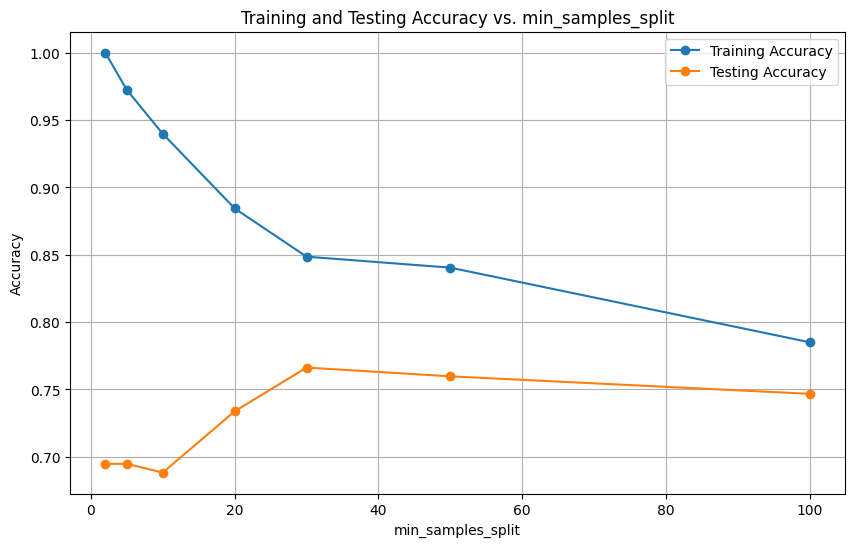

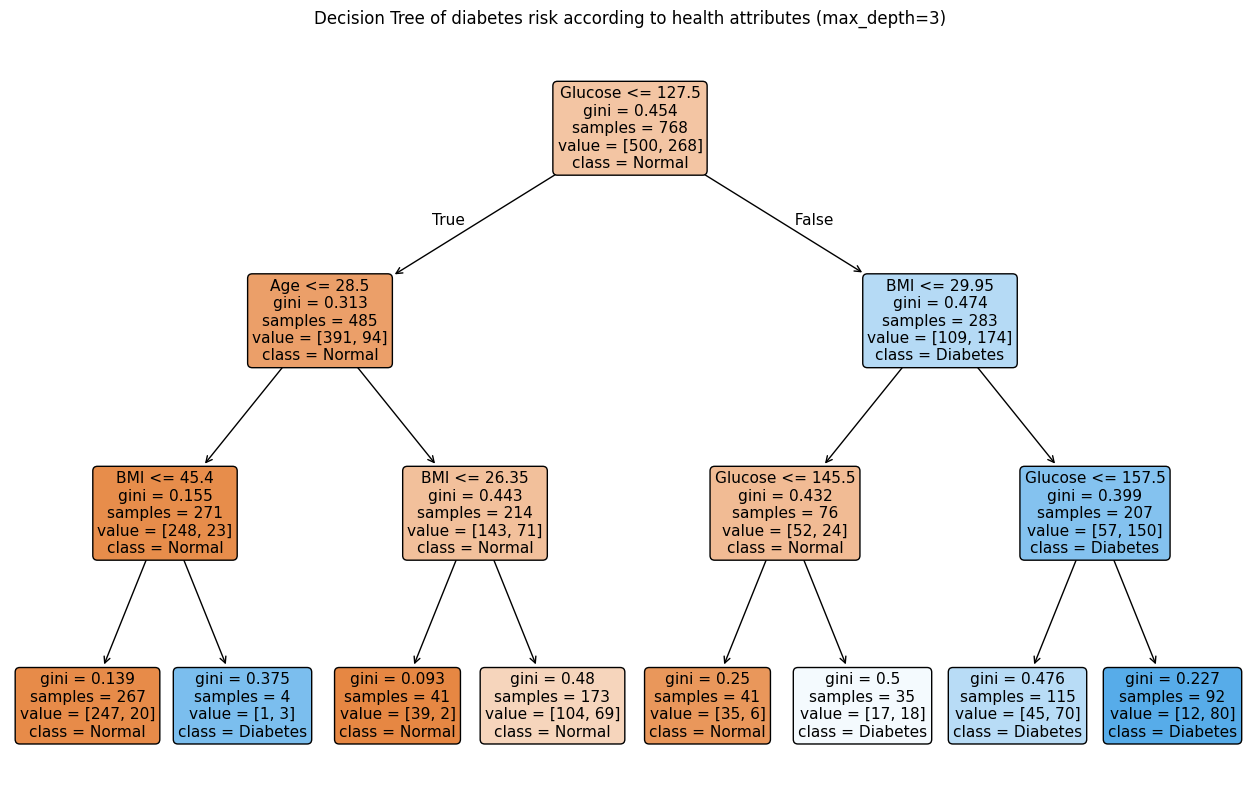

In [3]:
# EXERCISE 2-4: Decision Tree classifier with varying min_samples_split

def decision_tree_analysis(df):

    # Ensure the Outcome column is categorical, else we get value error from cls calling
    df['Outcome'] = df['Outcome'].astype(str)

    # Split features and labels
    X = df.drop(columns=['Outcome'])
    y = df['Outcome']

    # Stratified 80-20 train-test split with a fixed seed
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

    # Values for min_samples_split
    min_samples_splits = [2, 5, 10, 20, 30, 50, 100]

    # Lists to store accuracies
    train_accuracies = []
    test_accuracies = []

    # Train and evaluate Decision Tree for each min_samples_split
    for split in min_samples_splits:
        clf = DecisionTreeClassifier(min_samples_split=split, random_state=1)
        clf.fit(X_train, y_train)

        # Accuracy on training data appended to list
        train_acc = accuracy_score(y_train, clf.predict(X_train))
        train_accuracies.append(train_acc)

        # Accuracy on testing data appended to list
        test_acc = accuracy_score(y_test, clf.predict(X_test))
        test_accuracies.append(test_acc)

    # Plot the accuracies
    plt.figure(figsize=(10, 6))
    plt.plot(min_samples_splits, train_accuracies, label='Training Accuracy', marker='o')
    plt.plot(min_samples_splits, test_accuracies, label='Testing Accuracy', marker='o')
    plt.xlabel('min_samples_split')
    plt.ylabel('Accuracy')
    plt.title('Training and Testing Accuracy vs. min_samples_split')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Exercise 4 - Train Decision Tree with max_depth=3 and random_state=1
    clf = DecisionTreeClassifier(max_depth=3, random_state=1)
    clf.fit(X, y)

    plt.figure(figsize=(16, 10))
    plot_tree(clf, feature_names=X.columns, class_names=['Normal', 'Diabetes'], filled=True, rounded=True)
    plt.title('Decision Tree of diabetes risk according to health attributes (max_depth=3)')
    plt.show()

# EXERCISE 2-4: Run Decision Tree analysis with varying min_samples_split
decision_tree_analysis(diabetes_df)